In [35]:
import pandas as pd
import numpy as np
import datetime
import os
import os.path
! pip install pmdarima
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
import matplotlib.pylab as plt

In [26]:
dfmedellin = pd.read_csv(os.path.join('../Output', 'data_medellin.csv'))
dfmedellin_activos = dfmedellin[['FECHA','ACTIVOS']]
dfmedellin_nuevoscasos = dfmedellin[['FECHA','CASOS']]
dfm2 = pd.to_datetime(dfmedellin_nuevoscasos['FECHA'])
dfmedellin_nuevoscasos.index = dfm2
data_med = dfmedellin_nuevoscasos.drop(['FECHA'], axis=1)
#data_med

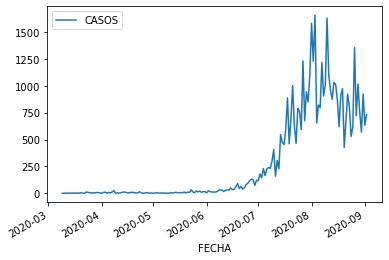

In [27]:
# Ver comportamiento de nuevos casos
# A partir de julio los datos crecen exponencialmente......
data_med.plot()

In [28]:
# prueba de estacionaridad (Dickey Fuller Aumentada)

adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(data_med)

(0.5791343898738751, True)

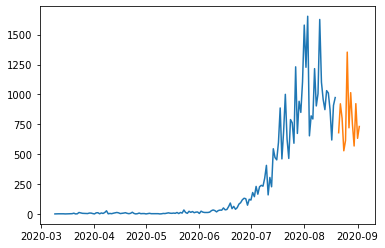

In [59]:
# data_train y data_test
train = data_med[:int(len(data_med)*0.92)]
test = data_med[int(len(data_med)*-0.08):]
plt.plot(train)
plt.plot(test)

In [ ]:
# Construcción ARIMA

In [60]:
modelo_arima = auto_arima(train, start_p=0, d=1, start_q=0, 
                          max_p=10, max_d=10, max_q=10,
                          start_P=0, D=1, start_Q=0, 
                          max_P=10, max_D=10, max_Q=10, m=12, seasonal=True,
                          error_action='warn', trace=True,
                          supress_warnings=True, stepwise=True, random_state=20, n_fit=50)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1953.886, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1842.194, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1901.645, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1835.191, Time=0.85 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1836.999, Time=1.53 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1837.023, Time=2.98 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1835.913, Time=0.89 sec


/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,0)(3,1,1)[12]             : AIC=1838.970, Time=5.09 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1880.500, Time=0.33 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1825.952, Time=1.09 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1830.968, Time=0.36 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=1827.952, Time=1.89 sec


/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,0)(2,1,1)[12]             : AIC=1827.952, Time=4.14 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=1826.905, Time=0.71 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=3.26 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1826.978, Time=0.78 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=1824.912, Time=1.86 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1830.142, Time=0.68 sec
 ARIMA(2,1,1)(3,1,0)[12]             : AIC=1826.782, Time=2.60 sec


/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(2,1,1)[12]             : AIC=1827.510, Time=3.60 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1825.162, Time=1.36 sec


/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(2,1,1)(3,1,1)[12]             : AIC=inf, Time=5.69 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1822.969, Time=0.71 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1828.143, Time=0.28 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=1824.864, Time=1.33 sec


/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=3.10 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1823.269, Time=0.59 sec


/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(3,1,1)[12]             : AIC=1826.869, Time=4.70 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1822.747, Time=0.66 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1828.130, Time=0.25 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=1824.475, Time=1.54 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.91 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1822.587, Time=0.49 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1824.497, Time=1.53 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1880.574, Time=0.06 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1823.012, Time=0.72 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1826.584, Time=1.46 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1879.228, Time=0.33 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=1823.419, Time=0.78 sec


/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/oem/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1825.217, Time=0.98 sec
 ARIMA(0,1,1)(1,1,1)[12] intercept   : AIC=1824.050, Time=0.69 sec

Best model:  ARIMA(0,1,1)(1,1,1)[12]          
Total fit time: 62.353 seconds


In [61]:
modelo_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  154
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -907.294
Date:                            Thu, 03 Sep 2020   AIC                           1822.587
Time:                                    22:01:40   BIC                           1834.382
Sample:                                         0   HQIC                          1827.380
                                            - 154                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6646      0.036    -18.521      0.000      -0.735      -0.594
ar.S.L12      -0.3993      0.118     -3.375      0.001      -0.631      -0.167
ma.S.L12      -0.4682      0.113     -4.137      0.000      -0.690      -0.246
sigma2      2.131e+04   1330.393     16.016      0.000    1.87e+04    2.39e+04
===================================================================================
Ljung-Box (Q):                       46.84   Jarque-Bera (JB):               219.91
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):            2603.60   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
#predicción con Auto Arima
prediccion_nuevoscasos = pd.DataFrame(modelo_arima.predict(n_periods = len(test)), index = test.index)
prediccion_nuevoscasos.columns = ['Predicción nuevos casos']
prediccion_nuevoscasos


,Predicción nuevos casos
FECHA,
2020-08-21,1176.543620
2020-08-22,936.363536
2020-08-23,1168.175327
2020-08-24,1125.836420
2020-08-25,1134.537808
2020-08-26,1392.261533
2020-08-27,1325.155156
2020-08-28,1449.082819
2020-08-29,906.771735


<ipython-input-63-302e2780edb6>:5: MatplotlibDeprecationWarning: Unrecognized location 'left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='left corner')


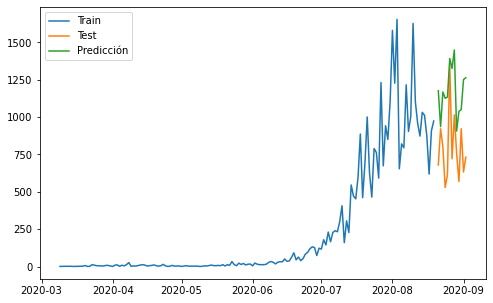

In [63]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Train')
plt.plot(test, label='Test')
plt.plot(prediccion_nuevoscasos, label='Predicción')
plt.legend(loc='left corner')
plt.show()


In [1]:
def objfunc(order, exog, endog):# agregar dates, freq='D'
    from statsmodels.tsa.arima_model import ARIMA
    fit = ARIMA(endog, order, exog).fit()
    return fit.aic()



from scipy.optimize import brute
grid = (slice(1, 3, 1), slice(1, 3, 1), slice(1, 3, 1))
brute(objfunc, grid, args=(exog, endog), finish=None)

NameError: name 'exog' is not defined

In [ ]:
#Esta biblioteca contiene una función auto_arima que nos permite establecer 
#un rango de valores p, d, q, P, D y Q y luego ajustar modelos para todas las combinaciones posibles. 
#Entonces, el modelo mantendrá la combinación que reportó el mejor valor de AIC.
#desde pyramid.arima importar auto_arima
stepwise_model = auto_arima (data, start_p = 1, start_q = 1, 
                           max_p = 3, max_q = 3, m = 12, 
                           start_P = 0, estacional = True, 
                           d = 1, D = 1, trace = True, 
                           error_action = 'ignore ',   
                           suppress_warnings = True, 
                           stepwise = True)
imprimir (modelo_paso.aic ())